# PROYECTO 2 CURSO INTELIGENCIA ARTIFICAL

En este notebook desarrollaremos el proyecto numero 2 del curso de inteligencia artificial de la unviersidad del valle semestre 1 año 2019, el cual consta de cargar un conjunto de datos y generar diagramas de tortas e histogramas.

      0    1    2   3         4     5    6        7        8      9        10  \
0     ID  Age  Sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak   
1      1   28    1   2       130   132    0        2      185      0        0   
2      2   29    1   2       120   243    0        0      160      0        0   
3      3   29    1   2       140          0        0      170      0        0   
4      4   30    0   1       170   237    0        1      170      0        0   
5      5   31    0   2       100   219    0        1      150      0        0   
6      6   32    0   2       105   198    0        0      165      0        0   
7      7   32    1   2       110   225    0        0      184      0        0   
8      8   32    1   2       125   254    0        0      155      0        0   
9      9   33    1   3       120   298    0        0      185      0        0   
10    10   34    0   2       130   161    0        0      190      0        0   
11    11   34    1   2      

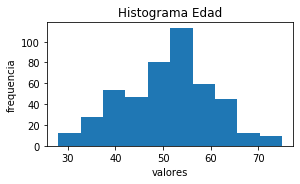

<Figure size 432x288 with 0 Axes>

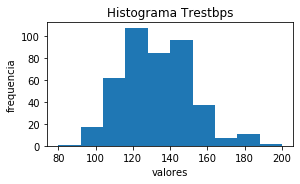

<Figure size 432x288 with 0 Axes>

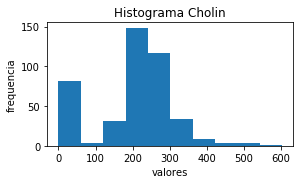

<Figure size 432x288 with 0 Axes>

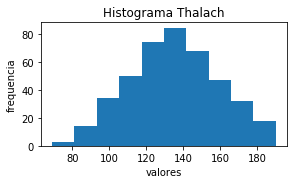

<Figure size 432x288 with 0 Axes>

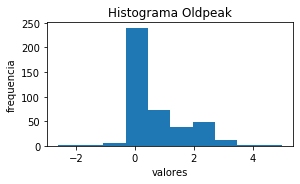

<Figure size 432x288 with 0 Axes>

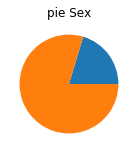

<Figure size 432x288 with 0 Axes>

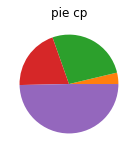

<Figure size 432x288 with 0 Axes>

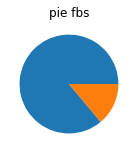

<Figure size 432x288 with 0 Axes>

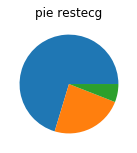

<Figure size 432x288 with 0 Axes>

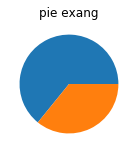

<Figure size 432x288 with 0 Axes>

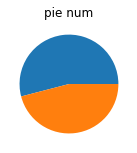

<Figure size 432x288 with 0 Axes>

In [46]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

data=[]
edad=[]
trestbps = []
chol = []
thalach = []
oldpeak = []
Sex = []
cp = []
fbs = []
restecg = []
exang = []
num = []
 
with open(r'C:\Users\Juancho270\Downloads\heart-disease-dataset-from-uci\HeartDisease.csv', newline='') as File:  
    reader = csv.reader(File)
    for row in reader:
        data.append(row)
        edad.append(row[1])
        Sex.append(row[2])
        cp.append(row[3])
        trestbps.append(row[4])
        chol.append(row[5])
        fbs.append(row[6])
        restecg.append(row[7])
        thalach.append(row[8])
        exang.append(row[9])
        oldpeak.append(row[10])
        num.append(row[11])
        
pf = pd.DataFrame(data)


edadint = []
trestbpsint = []
cholint = []
thalachint = []
oldpeakint = []
Sexint = []
cpint = []
fbsint = []
restecgint = []
exangint = []
numint = []

def convertirentero(vectorentrada,vectorsalida,nombre):
    for i in vectorentrada:
        if (i != nombre and i != ''):
            vectorsalida.append(float(i))
            
convertirentero(edad,edadint,"Age")
convertirentero(trestbps,trestbpsint,"trestbps")
convertirentero(chol,cholint,"chol")
convertirentero(thalach,thalachint,"thalach")
convertirentero(oldpeak,oldpeakint,"oldpeak")
convertirentero(Sex,Sexint,"Sex")
convertirentero(cp,cpint,"cp")
convertirentero(fbs,fbsint,"fbs")
convertirentero(restecg,restecgint,"restecg")
convertirentero(exang,exangint,"exang")
convertirentero(num,numint,"num")

def graficar(vector, nombre):
    fig = plt.figure(figsize=(15,5))
    plt.subplot2grid((2,3),(0,0))
    plt.hist(vector, 10)
    plt.ylabel('frequencia')
    plt.xlabel('valores')
    plt.title('Histograma'+ ' ' + nombre)
    plt.show()
    plt.clf()
    
def graficarpie(vector, nombre):
    fig = plt.figure(figsize=(15,5))
    veces0 = vector.count(0)
    veces1 = vector.count(1)
    veces2 = vector.count(2)
    veces3 = vector.count(3)
    veces4 = vector.count(4)
    plt.subplot2grid((2,3),(0,0))
    plt.pie([veces0,veces1,veces2,veces3,veces4])
    plt.title('pie'+ ' ' + nombre)
    plt.show()
    plt.clf()

graficar(edadint, 'Edad')
graficar(trestbpsint, 'Trestbps')
graficar(cholint,'Cholin')
graficar(thalachint,'Thalach')
graficar(oldpeakint, 'Oldpeak')
graficarpie(Sexint, 'Sex')
graficarpie(cpint, 'cp')
graficarpie(fbsint, 'fbs')
graficarpie(restecgint, 'restecg')
graficarpie(exangint, 'exang')
graficarpie(numint, 'num')


